In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np

from models.FaceRWKV import FaceRWKV, RWKVConfig
from Dataset import CAERSRDataset

import torchvision.transforms
import torchvision.models as models

In [14]:
mobilenet = models.mobilenet_v2(pretrained=True)
#print total amount of param
print(sum(p.numel() for p in mobilenet.parameters() if p.requires_grad))
#now mobilenet v3
mobilenet = models.mobilenet_v3_large(pretrained=True)
#print total amount of param
print(sum(p.numel() for p in mobilenet.parameters() if p.requires_grad))
# small
mobilenet = models.mobilenet_v3_small(pretrained=True)
#print total amount of param
print(sum(p.numel() for p in mobilenet.parameters() if p.requires_grad))

/Users/lukas/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lukas/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/lukas/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can 

3504872
5483032
2542856


/Users/lukas/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
resnet = models.resnet50(pretrained=True)
        # Remove the layers after stage 4
resnet = torch.nn.Sequential(*list(resnet.children())[:8])

In [12]:
x = torch.randn(1, 3, 400, 600)
y = resnet(x)
print(y.shape)

torch.Size([1, 2048, 13, 19])


In [82]:
data = CAERSRDataset("./data/CAER-S/train")

In [83]:
print(data.class_dict)

{'Disgust': 1}


In [84]:
img ,y= data.__getitem__(7)
print(img.shape)
print(y.shape)


torch.Size([3, 400, 552])
torch.Size([1])


In [85]:
reshaper = torchvision.transforms.Resize((224,224))
x = torch.randint(0,255,(3,225,224))
x = reshaper(x)
print(x.shape)

torch.Size([3, 224, 224])


/Users/lukas/miniconda3/envs/CV/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [86]:
#plot x in matplot
import matplotlib.pyplot as plt
#x = x/x.max()
#plt.imshow(  x.permute(1, 2, 0)  )
plt.show()
print(img.shape)
print(reshaper(img))
new_img = reshaper(img)

torch.Size([3, 400, 552])
tensor([[[2.6667e-01, 2.7451e-01, 2.7843e-01,  ..., 4.4608e-02,
          3.8375e-02, 4.1582e-02],
         [2.6667e-01, 2.7451e-01, 2.7843e-01,  ..., 5.4202e-02,
          5.4202e-02, 5.4202e-02],
         [2.7801e-01, 2.7829e-01, 2.8221e-01,  ..., 5.0980e-02,
          5.0980e-02, 5.0980e-02],
         ...,
         [3.6347e-01, 3.3325e-01, 2.1327e-01,  ..., 1.7521e-01,
          1.7762e-01, 1.5462e-01],
         [3.8333e-01, 4.1897e-01, 2.4753e-01,  ..., 1.7088e-01,
          1.6443e-01, 1.4998e-01],
         [4.3514e-01, 3.8378e-01, 3.0193e-01,  ..., 1.6285e-01,
          1.6186e-01, 1.3908e-01]],

        [[1.7647e-01, 1.7255e-01, 1.6863e-01,  ..., 0.0000e+00,
          0.0000e+00, 4.1261e-04],
         [1.7647e-01, 1.7255e-01, 1.6863e-01,  ..., 7.1429e-03,
          7.1429e-03, 7.1429e-03],
         [1.7647e-01, 1.7633e-01, 1.7491e-01,  ..., 1.4006e-04,
          1.4006e-04, 1.4006e-04],
         ...,
         [1.9197e-01, 1.7801e-01, 7.0128e-02,  ..., 2

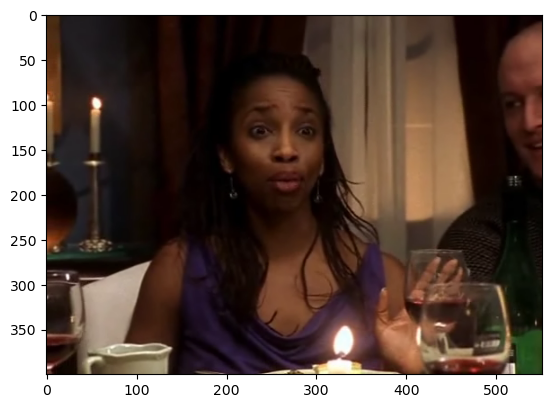

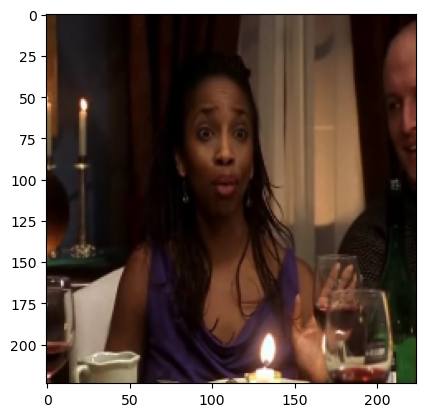

torch.Size([3, 400, 552])
tensor([[[2.6667e-01, 2.7451e-01, 2.7843e-01,  ..., 4.4608e-02,
          3.8375e-02, 4.1582e-02],
         [2.6667e-01, 2.7451e-01, 2.7843e-01,  ..., 5.4202e-02,
          5.4202e-02, 5.4202e-02],
         [2.7801e-01, 2.7829e-01, 2.8221e-01,  ..., 5.0980e-02,
          5.0980e-02, 5.0980e-02],
         ...,
         [3.6347e-01, 3.3325e-01, 2.1327e-01,  ..., 1.7521e-01,
          1.7762e-01, 1.5462e-01],
         [3.8333e-01, 4.1897e-01, 2.4753e-01,  ..., 1.7088e-01,
          1.6443e-01, 1.4998e-01],
         [4.3514e-01, 3.8378e-01, 3.0193e-01,  ..., 1.6285e-01,
          1.6186e-01, 1.3908e-01]],

        [[1.7647e-01, 1.7255e-01, 1.6863e-01,  ..., 0.0000e+00,
          0.0000e+00, 4.1261e-04],
         [1.7647e-01, 1.7255e-01, 1.6863e-01,  ..., 7.1429e-03,
          7.1429e-03, 7.1429e-03],
         [1.7647e-01, 1.7633e-01, 1.7491e-01,  ..., 1.4006e-04,
          1.4006e-04, 1.4006e-04],
         ...,
         [1.9197e-01, 1.7801e-01, 7.0128e-02,  ..., 2

In [95]:
plt.imshow(  img.permute(1, 2, 0)  )
plt.show()
plt.imshow(  new_img.permute(1, 2, 0)  )
plt.show()
print(img.shape)
print(new_img)

In [88]:

# RWKV       : our new model - fastest when ctx_len is long - VRAM friendly - good performance
# MHA_rotary : usual MultiheadAttention+Rotary+GeGLU - not as good
# MHA_shift  : with time-shift - good performance
# MHA_pro    : slow (lots of tricks) - VRAM hungry - very good performance
model_type = 'RWKV'

# datafile = u"V:\\NLP\\text8"
# datafile = u"V:\\NLP\\enwik8"
datafile = u"V:\\NLP\\simplebooks\\simplebooks-92-raw\\train.txt"
datafile_encoding = 'utf-8'
# datafile = u"D:\\NLP-Data\\ww100M.txt"
# datafile = u"D:\\NLP-Data\\__2019.txt"
# datafile = u"Y:\\BlinkNLP\\_txt_\\txt\\_all.txt"
# datafile = u"V:\\NLP\\enwik8-shift-300.bpe"
# datafile_encoding = 'utf-16'
# datafile = u"V:\\NLP\\simplebooks-shift-utf32.word"
# datafile_encoding = 'utf-32'

datafile_type = 0 # use 0 for char-level english. use 1 for chinese. only affects some RWKV hyperparametrs 

#################################### VERY IMPORTANT ####################################
epoch_save_frequency = 10                            # 0 = never, 1 = every 'epoch', 2 = every two 'epoch', etc.
epoch_save_path = 'trained-'

batch_size = 32                                     # if you see "CUDA out of memory", reduce this.
                                                     # if you have good GPU, increase this.
                                                     # use GPU-Z to find the highest value for your VRAM.

n_epoch = 100                                        # the 'epoch' here is actually very short (and of fixed length)
########################################################################################

model_level = 'character' # 'character' (recommended) or 'word'

ctx_len = 256 # context length, try 512 or 1024 if you have good GPU
n_layer = 6   # try 12 for 100M, 24 for 300M
n_head = 8    # try 12 for 100M, 16 for 300M

n_embd = n_head * 64
n_attn = n_embd
n_ffn = n_embd

lr_init = 6e-4 if model_type == 'RWKV' else 4e-4    # RWKV can use higher lr.  8e-4 = 0.0008   4e-4 = 0.0004
lr_final = 4e-5

betas = (0.9, 0.99) if model_type == 'RWKV' else (0.9, 0.99)
eps = 4e-9
weight_decay = 0 if model_type == 'RWKV' else 0.01  # wd is not useful when we have enough data

epoch_length_fixed = 10000                          # make an 'epoch' very short, so we can see the training progress

######## special hyperparameters for RWKV model ########
rwkv_emb_scale = 0.4                                # scale of initial embedding. 0.4 is a good choice
rwkv_tiny_attn = 0#64 if (datafile_type == 0 and ctx_len > 600) else 0 # extra tiny attention dim, useful for long ctx char-level english
rwkv_tiny_head = 1                                  # 1 is good enough. 8 is slow
# n_side_proj = 512  

In [89]:
config = RWKVConfig()

In [90]:
model = FaceRWKV(config)

In [91]:
# create new random x
x = torch.rand(1, 3, 256, 256)
#x = torch.rand(1, 3, 1024, 1024)

    def __getitem__(self, idx):
        # cheat: pick a random spot in dataset
        i = np.random.randint(0, len(self.data) - (self.ctx_len + 1))
        chunk = self.data[i:i+self.ctx_len+1]
        dix = [self.stoi[s] for s in chunk]
        x = torch.tensor(dix[:-1], dtype=torch.long,
                         device=torch.device('cuda'))
        y = torch.tensor(dix[1:], dtype=torch.long,
                         device=torch.device('cuda'))
        return x, y
        

## Solution for context len probelm (temporary)
- Calc patch size so that the context len is less eq than 1024 or 512 (around 16 or 32)
- better solution? Use pretrained conv net to aggregate to a smaller fature map with unifrom size for all input, then feed to rwkv -> TODO 
- Maybe include padding for the sequence -> Gotta look into internal RWKV processing steps

In [92]:
output = model(x)

x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])
x torch.Size([1, 256, 768])


In [93]:
print(output.shape)

torch.Size([1, 10])
